<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## **Task 1** : Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## **Task 2** : Descriptive Statistics and Visualizations

#### Visualization using a Boxplot

##### Understanding the expansion of dataset in column name **Median value of owner-occupied homes in $1000's** through a boxplot so that we can see if there's any outlier, 25th/75th percentile and IQR

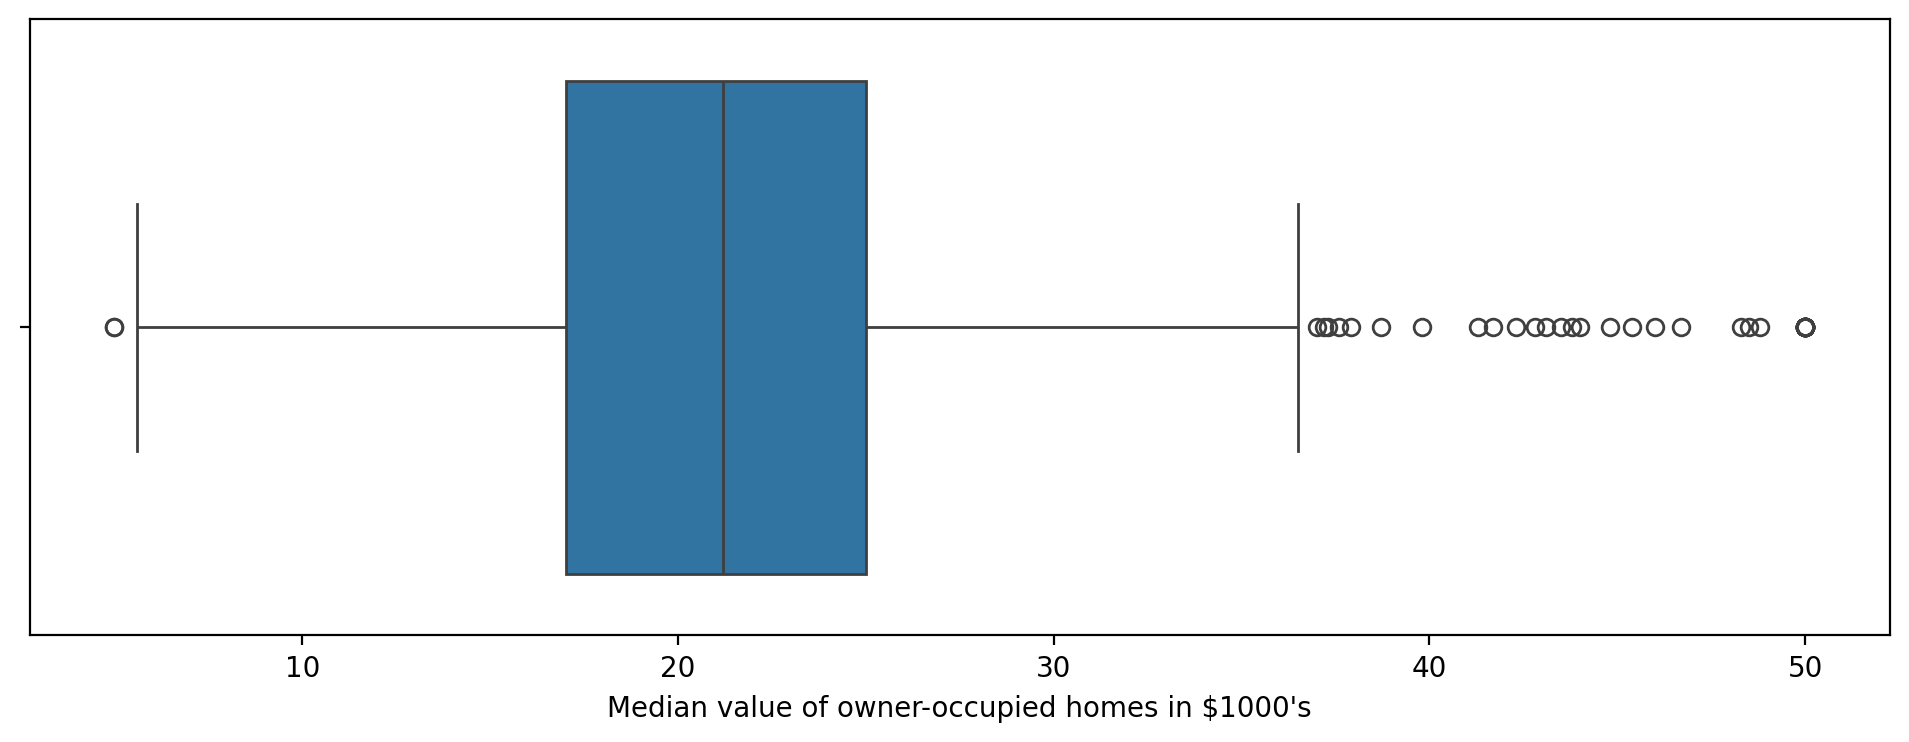

In [9]:
pyplot.figure(figsize = (12,4), dpi = 200)
sns.boxplot(x = boston_df['MEDV'])
pyplot.xlabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

##### **Conclusion**
* 25% of values are before 17.025 and 75% of values are covered under 25
* The IQR(InterQuartile Range) includes the median of 21.20
* There are some outliers present after the value of 37.00
* Also, the min value 5.00 is present in the form of the circle in the left side.

#### Visual Representation of Charles River variable

##### Shows the difference between number of tract bounds to river w.r.t one's where tract doesn't bounds to river using barplot

In [10]:
#categorizing the charles river variable (0,1) based on significant labels for better representation
boston_df.loc[(boston_df['CHAS'] == 1), 'If_bounded'] = 'tract bounds river'
boston_df.loc[(boston_df['CHAS'] == 0), 'If_bounded'] = "tract doesn't bounds river"

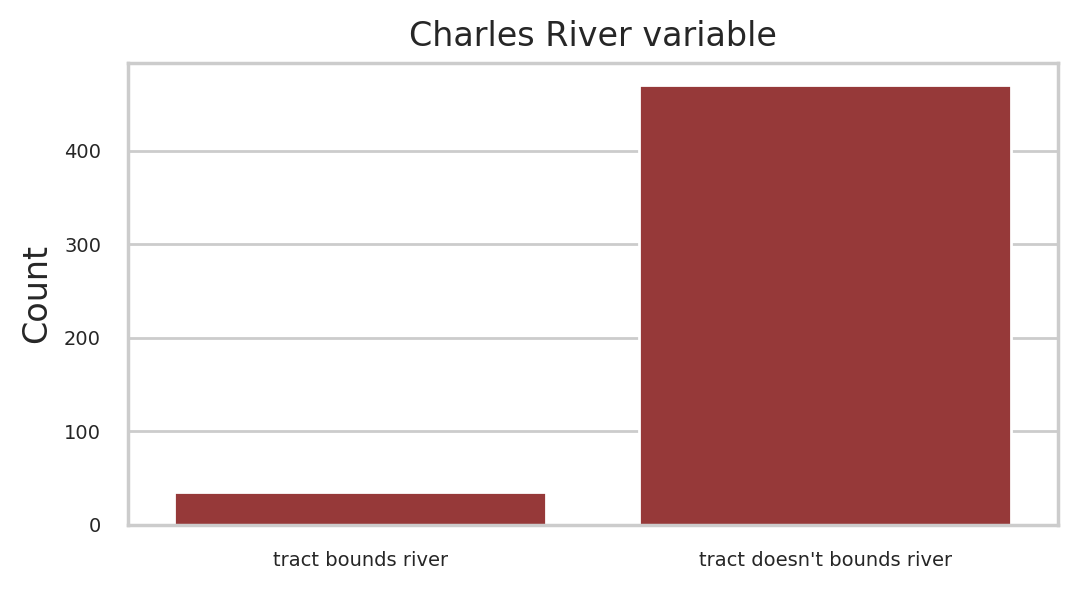

In [45]:
pyplot.figure(figsize=(6,3), dpi =200)
sns.set(style="whitegrid")
sns.barplot(boston_df.groupby('If_bounded').count()['CHAS'], color = 'brown')
pyplot.xlabel("")
pyplot.ylabel("Count")
pyplot.xticks(size=7)
pyplot.yticks(size=7)
pyplot.title("Charles River variable")
pyplot.show()

**Observation**: Compared to the 'tract doesn't bounds river' category, the one's who bounds are very less

#### MEDV variable v/s the AGE variable
##### Understanding the dispersion of MEDV variable based on three different age groups

In [14]:
# Creating a new column 'Age Group' with labels based on different ranges of age
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

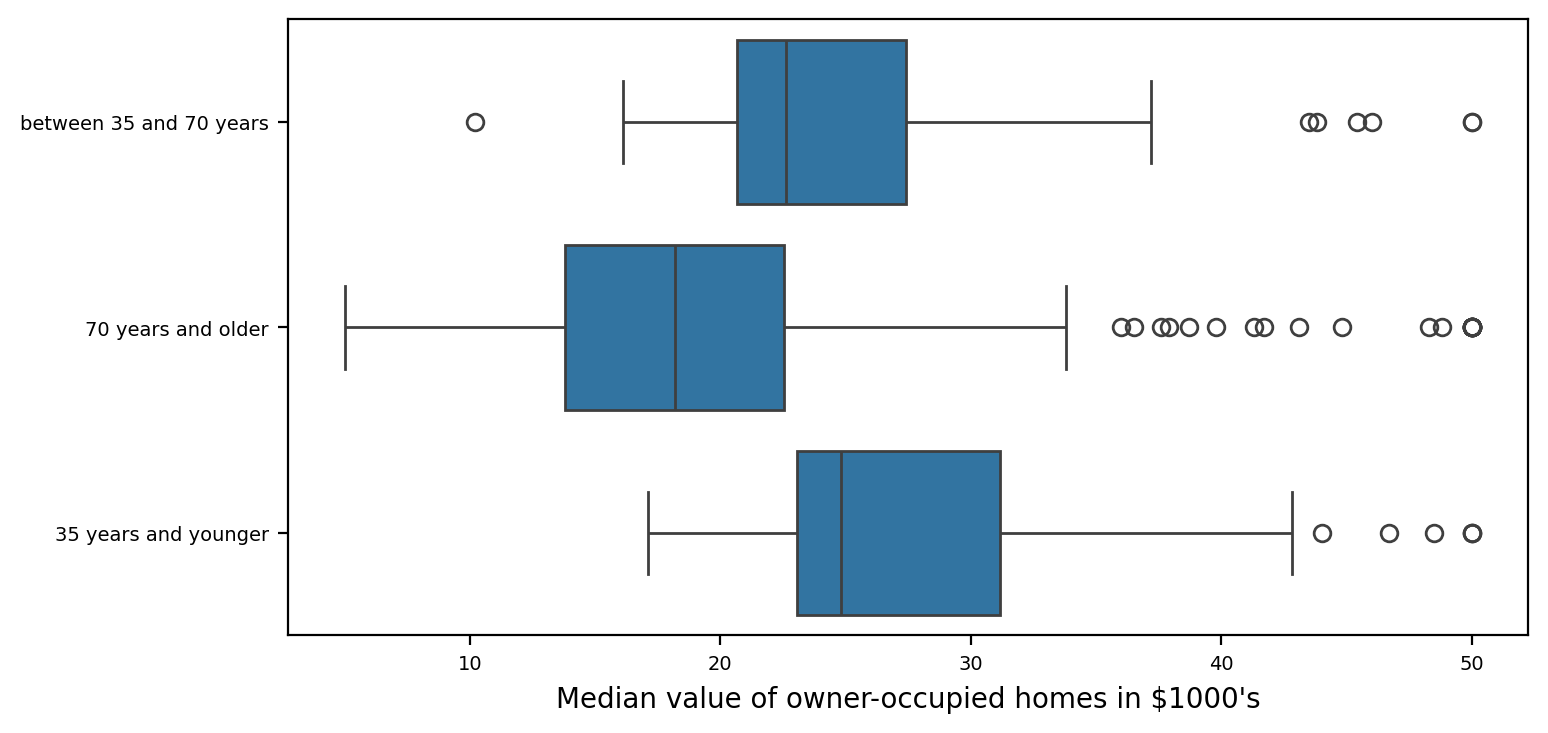

In [15]:
pyplot.figure(figsize=(8,4), dpi = 200)
sns.boxplot(y='age_group', x='MEDV', data=boston_df)
pyplot.xticks(size=7)
pyplot.yticks(size=7)
pyplot.ylabel("")
pyplot.xlabel("Median value of owner-occupied homes in $1000's")
pyplot.show()

**Conclusion**

* Least MEDV values are present in '70 years and older' group, with most of the outliers.
* Median of these age groups ranges in between 15 to 25 MEDV values
* More younger the age group, more is the MEDV values (as expected)


#### Scatterplot for understanding relationshsip between two continuous variables
##### Nitric oxide concentrations v/s the proportion of non-retail business acres per town.

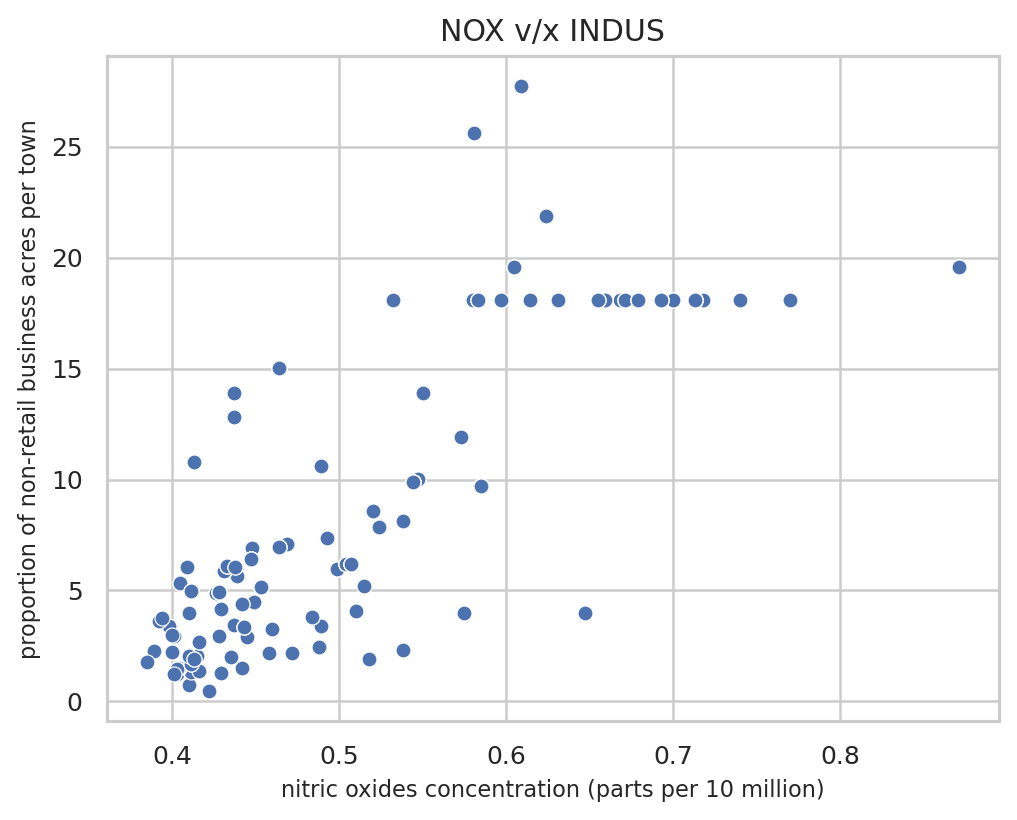

In [67]:
pyplot.figure(dpi = 180)
sns.scatterplot(data = boston_df, x = 'NOX', y = 'INDUS')
pyplot.xlabel("nitric oxides concentration (parts per 10 million)", size = 9)
pyplot.ylabel("proportion of non-retail business acres per town", size = 9)
pyplot.xticks(size=10)
pyplot.yticks(size=10)
pyplot.title('NOX v/x INDUS')
pyplot.show()

##### **Conclusion**
* Scattering of points does create a linear relationship(somehow)
* It shows that increase in ***propotion of non-retail business acres per town*** increases with the increase of ***NOX(Nitric Oxides) concentration***
* The increament is further divided into two ranges:

       1. between 0.4 to 0.6 NOX value, the increament is strongly linear and shows perfect relationship
  
       2. between 0.6 to 0.8, firstly it has a rapid rise from the previous range and increament goes somehow in a constant motion along with some outliers.

##### OPTIONAL

In [22]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
#p-value is way too less from significant value, that means we can say that there's a strong relationship between NOX and INDUS

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [21]:
boston_df[['NOX', 'INDUS']].corr()
# 0.76 --> 1 (positive correlation) indicates the strong linear relationship and similarity of both features/columns.

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


#### Histogram for Visual Representation
##### Understanding the distribution of pupil to teacher ratio variable

In [29]:
# Pupil to teacher ratio variable data series
boston_df['PTRATIO']

0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: PTRATIO, Length: 506, dtype: float64

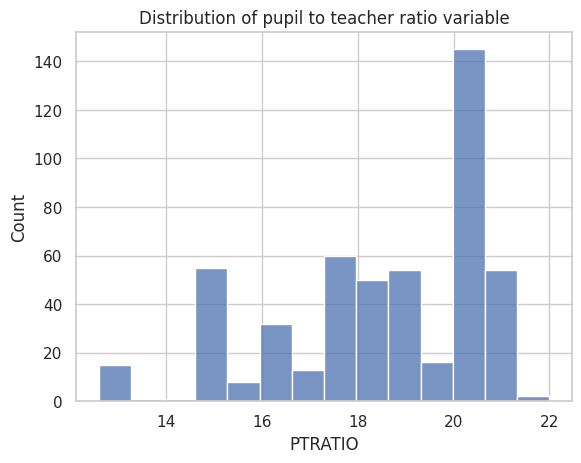

In [47]:
sns.histplot(x = boston_df['PTRATIO'])
pyplot.title("Distribution of pupil to teacher ratio variable")
pyplot.show()

##### **Conclusion**
* The distribution is non-symmetric (Mostly left-skewed) or doesn't shows an appropriate signs of normal distribution.
* Highest count of PTRATIO value is around 20
* For more understanding, I have added a Probability density graph as below. This shows the noice within the distribution of ratio

<AxesSubplot:xlabel='PTRATIO', ylabel='Probability'>

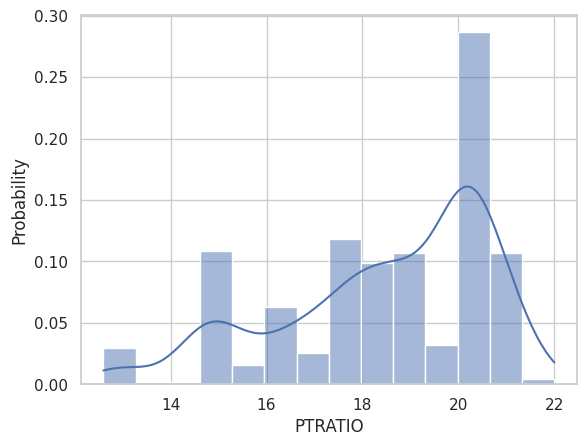

In [46]:
sns.histplot(x = boston_df['PTRATIO'], kde = True, stat = 'probability')

## **Task 3** : Appropriate statistical tests to answer the questions related to dataset

#### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?

I will be using the t-test for independent samples as the following assumptions are met:

*   One independent, categorical variable with two levels or group - Bounded/Not bounded to Charles River
*   One dependent continuous variable - MEDV
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance 

Stating Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded and doesn't bounded by Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded and doesn't bounded by Charles river")

Using ***α*** = **0.05**

We can plot the dependent variable with a historgram

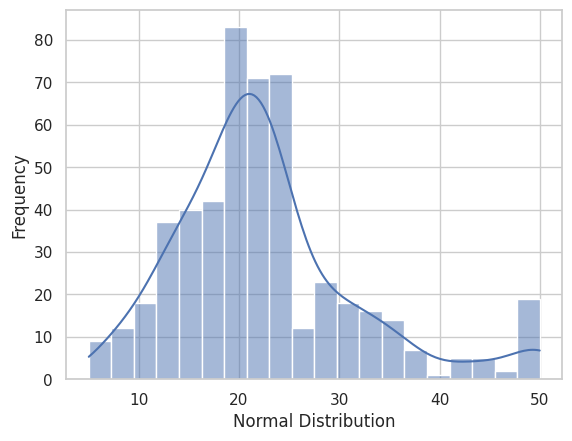

In [53]:
ax = sns.histplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  cbar_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
pyplot.show()

# Somehow right-skewed normal distribution curve --> We can consider it as a normal distributed variable

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library

In [56]:
tract_bounds_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
tract_not_bounds_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [63]:
t_statistics, p_value = scipy.stats.ttest_ind(tract_bounds_river, tract_not_bounds_river)
print("T_Statistic: {0}, P-Value: {1}".format(t_statistics,p_value))

T_Statistic: 3.996437466090509, P-Value: 7.390623170519905e-05


**Conclusion** --> Since the p-value is too less than the significance value (alpha = 0.05), hence we reject the null hypothesis(H_0) and can say that there's a significant difference in median value of houses bounded and doesn't bounded by Charles river

#### **Question 2**: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

To make sure that we do the proportion wise MEDV comparison, let's use the grouped data that is, segregated based on age group as follows:
*   35 years and younger
*   between 35 and 70 years
*   70 years and older

Because we have more than two groups here, I will be using the ANOVA (F-Statistics) test to check the difference in means of all three groups

Stating Hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

Using ***α*** = **0.05**

First, separate the three samples (one for each age group) into a variable.

In [68]:
thirty_five_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [71]:
# Test for equality of variance
scipy.stats.levene(thirty_five_lower, thirtyfive_seventy, seventy_older, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

p-value is greater than 0.05, hence we can assume that variance is equal

**One-Way ANOVA Test** for equal means

In [70]:
f_statistic,p_value = scipy.stats.f_oneway(thirty_five_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion** --> Since the p-value is too less than the significance value (alpha = 0.05), hence we reject the null hypothesis(H_0) and can say that there's a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

#### **Question 3**: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?  

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town (There is a relation)

Using ***α*** = **0.05**

Since they are both continuous variables I can use a **pearson correlation test**

In [73]:
Pr_statistics, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 7.913361061210442e-98


**Conclusion** --> Since the p-value is too less than the significance value (alpha = 0.05), hence we reject the null hypothesis(H_0) and proved that there's a strong relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

It shows that increase in ***propotion of non-retail business acres per town*** increases with the increase of ***NOX(Nitric Oxides) concentration***

#### Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [77]:
# These are the two features from the dataset
# DIS :- Additional weighted distance to the five Boston employment centres
# MEDV :- Median value of owner occupied homes
boston_df[['DIS','MEDV']].head()

,DIS,MEDV
0,4.0900,24.0
1,4.9671,21.6
2,4.9671,34.7
3,6.0622,33.4
4,6.0622,36.2


Talking about the "impact of an additional weighted distance on MEDV". This states that we have to check the dependency of MEDV on DIS(weighted distance). So, we can say that:

* DIS is the Independent Variable
* MEDV is the Dependent Variable

I will be using **Regression Analysis** for these continuous variables to check the following hypothesis:

*   $H\_0:$ There is no dependency of MEDV on DIS
*   $H\_1:$ There is an impact of an additional weighted distance to the five Boston employment centres on MEDV of owner occupied homes

Using ***α*** = **0.05**

In [79]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        18:07:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion** --> Since the p-value is less than the significance value (alpha = 0.05), hence we reject the null hypothesis(H_0) and proved that there's an impact of additional weighted distance to the five Boston employment centres on MEDV of owner occupied homes

So, what kind of impact does it makes?

**Answer**: Inspecting the ***coef*** (1.0916) from statistics provided through OLS Regression model, it indicates a positive relationship between DIS and MEDV, as one increases, the value of other variable will also increases. Hence, we can say that increasing every unit of distance from **Boston employment centres** will increase the median value of owner occupied homes.